In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import xgboost as xgb

In [2]:
traindata = pd.read_csv("./train.csv")
testdata = pd.read_csv("./test.csv")

In [3]:
traindata["AGR"].fillna(traindata["AGR"].mean(), inplace=True)
testdata["AGR"].fillna(testdata["AGR"].mean(), inplace=True)

In [4]:
traindata = pd.get_dummies(traindata, columns=['GENDER'], drop_first=True)
testdata = pd.get_dummies(testdata, columns=["GENDER"], drop_first=True)

In [5]:
independent_variables = ['AGE',
 'TB',
 'DB',
 'ALP',
 'ALT',
 'AST',
 'TP',
 'ALB',
 'AGR',
 'GENDER_Male']

In [6]:
independent_variables_without_gender = ['AGE',
 'TB',
 'DB',
 'ALP',
 'ALT',
 'AST',
 'TP',
 'ALB',
 'AGR',]

In [7]:
dependent_variable = ['STATUS']

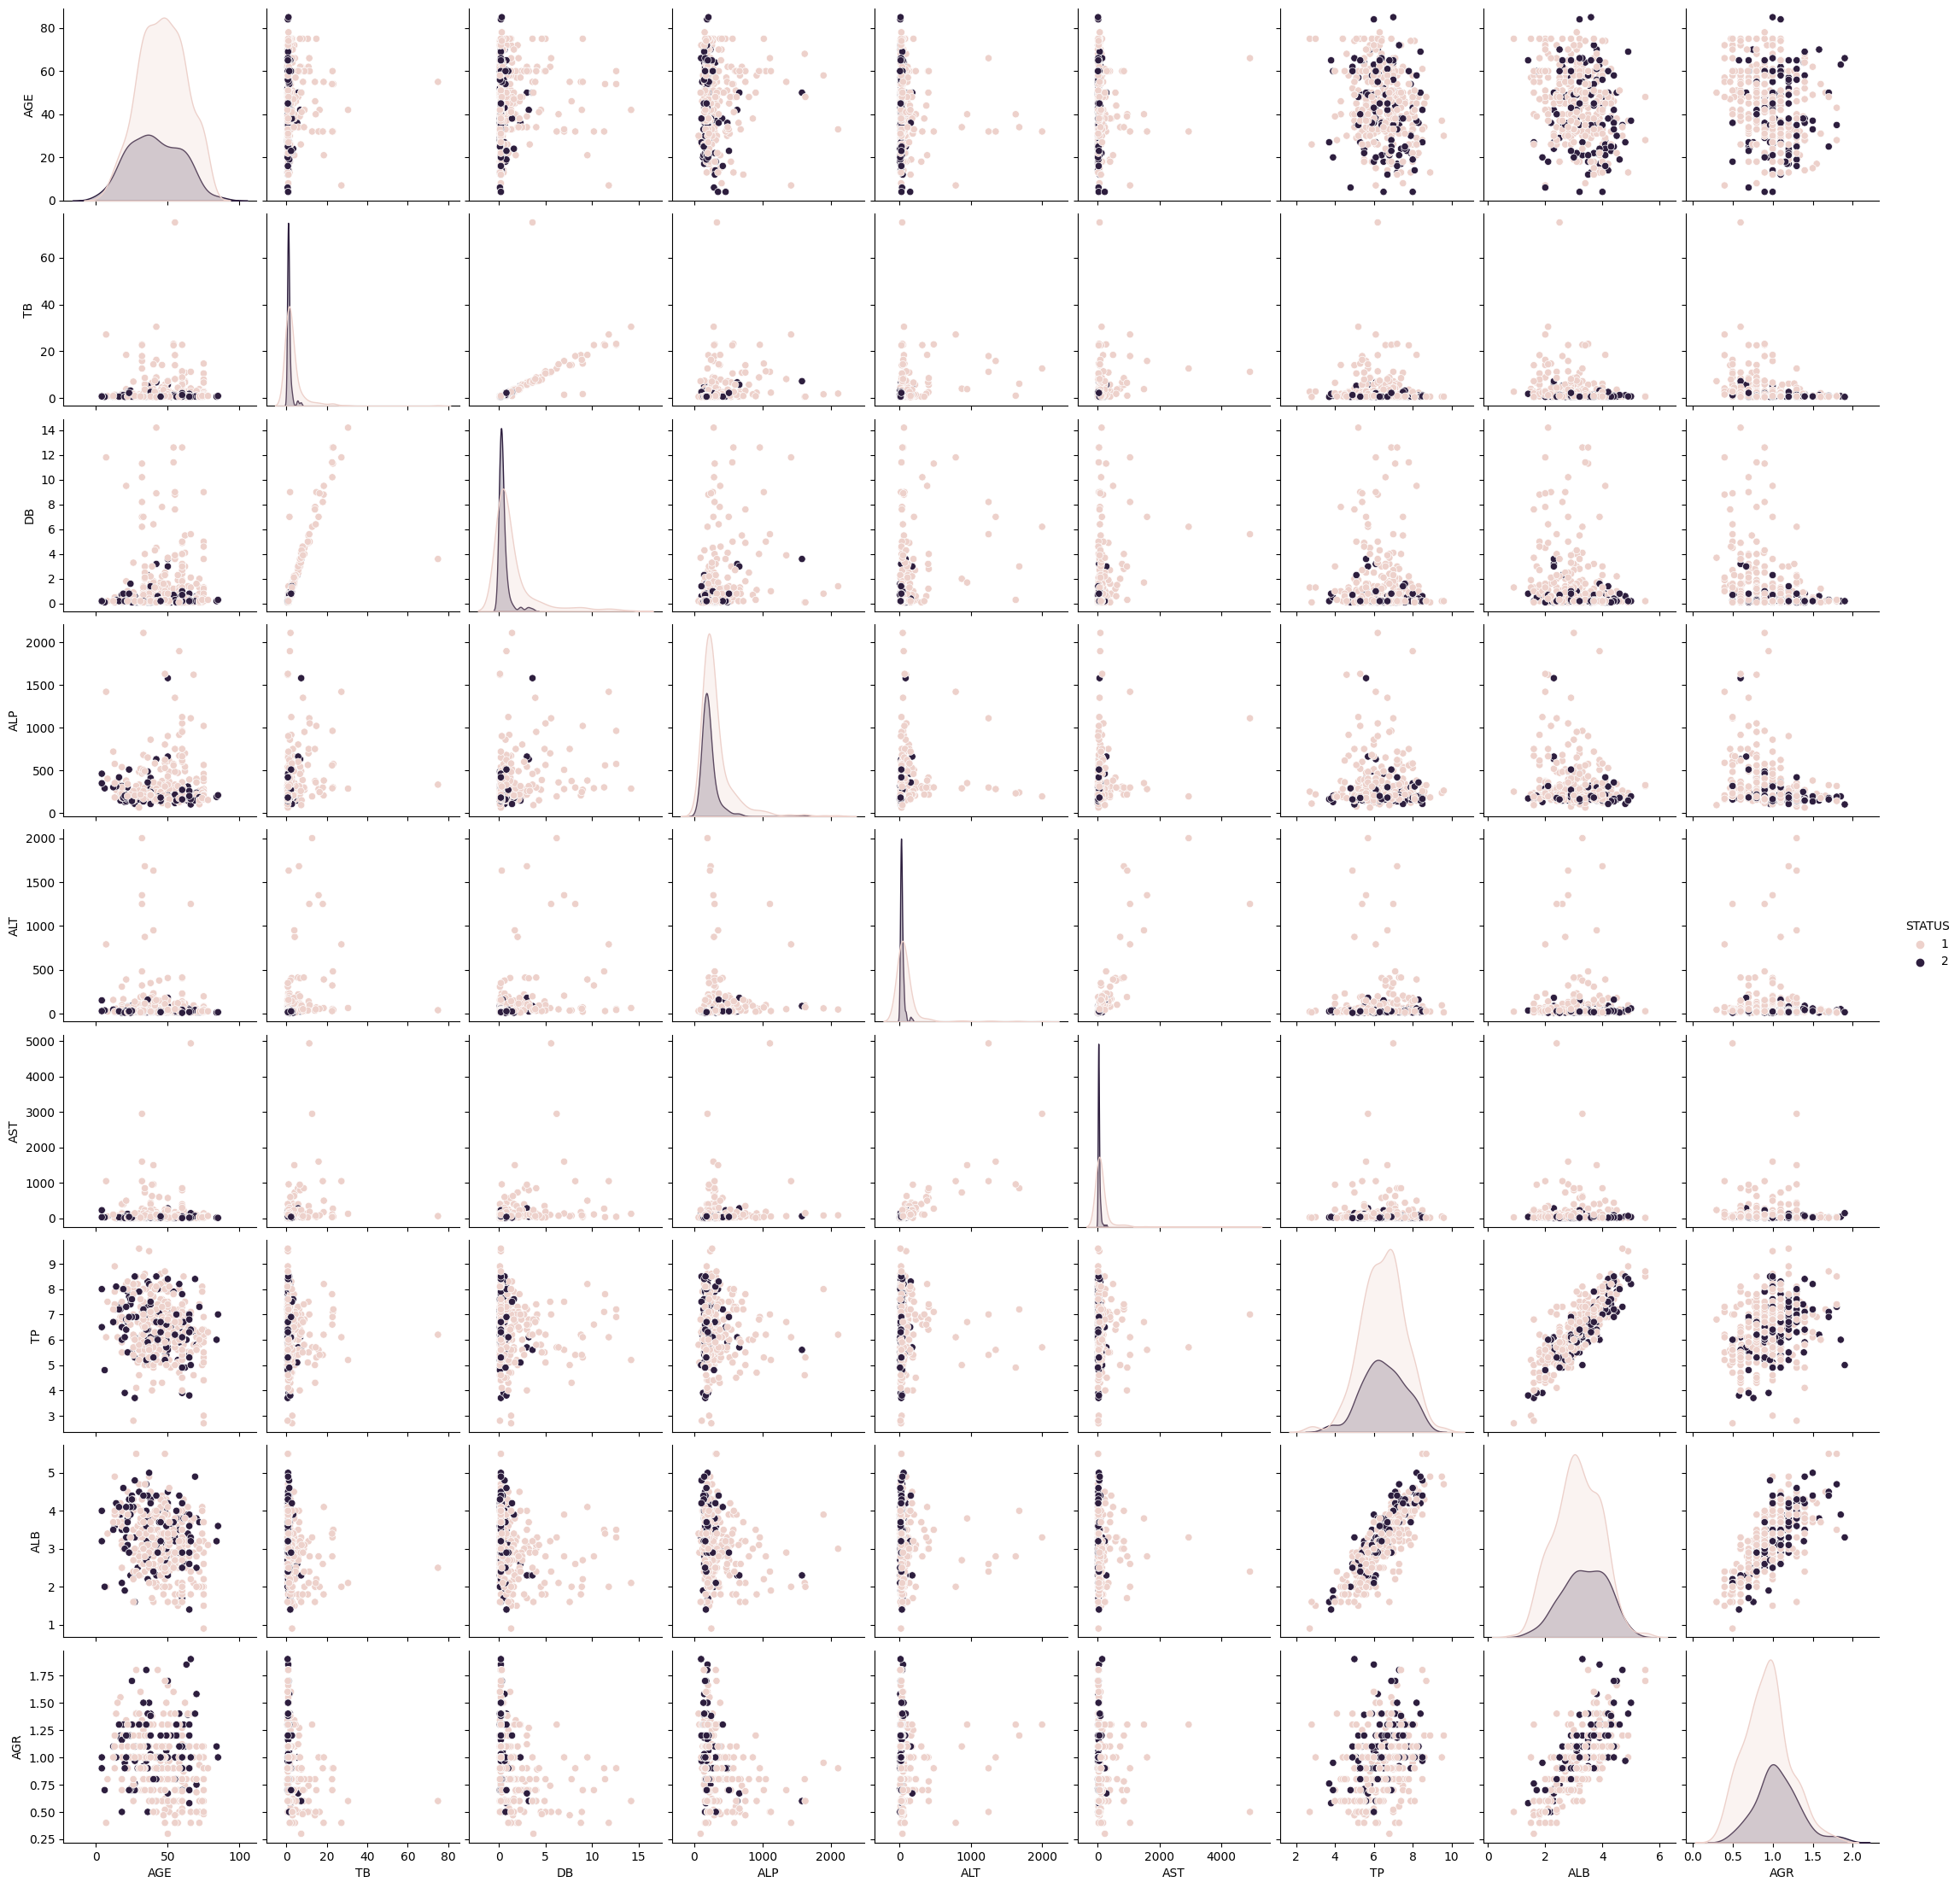

In [8]:
import seaborn as sns
sns.pairplot(traindata[independent_variables_without_gender + ["STATUS"]], hue="STATUS")

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(traindata[independent_variables_without_gender])

In [10]:
# sns.pairplot(pd.DataFrame(scaled_data, columns=independent_variables_without_gender))

In [11]:
normalized_data = pd.concat([pd.DataFrame(scaled_data, columns=independent_variables_without_gender),
                            pd.DataFrame(traindata["GENDER_Male"])], axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data.values, traindata["STATUS"].values, test_size=0.3, random_state=42)

In [13]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_accuracy, f1_score(y_test, y_pred)

(0.6585365853658537, 0.7586206896551724)

In [16]:
confusion_matrix(y_test, y_pred)

array([[66, 21],
       [21, 15]])

In [17]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.76      0.76      0.76        87\n           2       0.42      0.42      0.42        36\n\n    accuracy                           0.66       123\n   macro avg       0.59      0.59      0.59       123\nweighted avg       0.66      0.66      0.66       123\n'

In [18]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, np.where(y_train == 2, 0, y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
xgb_y_pred = model.predict(X_test)

In [20]:
xgb_accuracy = accuracy_score(y_test, np.where(xgb_y_pred == 0, 2, xgb_y_pred))

In [21]:
xgb_accuracy, f1_score(np.where(xgb_y_pred == 0, 2, xgb_y_pred), y_test)

(0.6585365853658537, 0.7586206896551724)

In [22]:
from sklearn.svm import SVC

In [23]:
pd.concat([pd.DataFrame(X_train, columns = independent_variables), pd.DataFrame(y_train, columns = ["STATUS"])], axis=1)["STATUS"].value_counts()

1    205
2     82
Name: STATUS, dtype: int64

In [24]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [25]:
accuracy_score(svm_model.predict(X_test), y_test)

0.5447154471544715

In [26]:
f1_score(svm_model.predict(X_test), y_test)

0.5882352941176471

In [27]:
svm_model.predict(X_test)

array([1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1])

In [28]:
pd.concat([pd.DataFrame(X_train, columns = independent_variables), pd.DataFrame(y_train, columns = ["STATUS"])], axis=1)

,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR,GENDER_Male,STATUS
0,1.753536,-0.339363,-0.411079,-0.246864,-0.335309,-0.283406,1.311509,1.011482,0.112714,0.0,1
1,0.794137,-0.357671,-0.457728,-0.694375,-0.141952,-0.195940,-0.432543,-0.248262,0.112714,1.0,1
2,-1.604361,-0.357671,-0.457728,-0.271054,-0.146786,-0.177844,0.393587,1.011482,1.164715,1.0,1
3,-0.525037,-0.375979,-0.457728,-0.577458,-0.311140,-0.265309,-0.524335,-0.122287,0.463381,0.0,2
4,-0.525037,-0.339363,-0.504377,0.769108,-0.291804,-0.238165,-0.524335,-0.500210,-0.237952,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
282,1.813498,-0.357671,-0.457728,-0.432319,-0.315974,-0.253245,-1.901218,-1.759954,-1.289953,0.0,1
283,-0.525037,0.466178,0.521899,-0.605679,-0.257967,-0.063234,-1.258672,-0.752159,0.112714,1.0,2
284,-0.465075,-0.375979,-0.457728,-0.242832,0.051405,-0.177844,2.780184,2.145252,0.112714,1.0,1
285,1.513686,-0.266132,-0.364431,0.253059,-0.320808,-0.298486,-0.340750,-0.500210,-0.588619,1.0,1


In [29]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled  = X_train, y_train

In [30]:
pd.concat([pd.DataFrame(X_train_resampled, columns = independent_variables), pd.DataFrame(y_train_resampled, columns = ["STATUS"])], axis=1)["STATUS"].value_counts()


1    205
2     82
Name: STATUS, dtype: int64

In [31]:
svm_model2 = SVC(kernel="linear", C=1.0, random_state=42, class_weight='balanced')
svm_model2.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', kernel='linear', random_state=42)

## After preprocessing and Normalizing data below are the accuracys and F1-Scores

### svm

In [32]:
accuracy_score(svm_model2.predict(X_test), y_test)

0.5447154471544715

### xgbBosst

In [33]:
test = xgb_model.fit(X_train_resampled, np.where(y_train_resampled == 2, 0, y_train_resampled))
test.predict(X_test)
accuracy_score(np.where(xgb_model.predict(X_test) == 0, 2, xgb_model.predict(X_test)), y_test)

0.6829268292682927

In [34]:
y_test

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [35]:
f1_score(np.where(xgb_model.predict(X_test) == 0, 2, xgb_model.predict(X_test)), y_test)

0.7868852459016394

### decision Tree

In [36]:
DT_model2 = DecisionTreeClassifier(random_state=42, max_depth=5)
DT_model2.fit(X_train_resampled, y_train_resampled)
accuracy_score(DT_model2.predict(X_test), y_test)


0.6585365853658537

In [37]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)
accuracy_score(y_test, logistic_model.predict(X_test)), f1_score(y_test, logistic_model.predict(X_test))

(0.7317073170731707, 0.83248730964467)

In [38]:
confusion_matrix(y_test, logistic_model.predict(X_test))

array([[82,  5],
       [28,  8]])

## Hyperparameter Tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=6, cv=5, scoring='accuracy')
random_search.fit(X_train_resampled, y_train_resampled)
best_params = random_search.best_params_


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=6. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [40]:
best_logistic_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='lbfgs')
best_logistic_model.fit(X_train_resampled, y_train_resampled)
accuracy_score(y_test, best_logistic_model.predict(X_test)), f1_score(y_test, best_logistic_model.predict(X_test))

(0.6829268292682927, 0.7936507936507937)

In [41]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_model3 = DecisionTreeClassifier()
DT_random_search = RandomizedSearchCV(dt_model3, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
DT_random_search.fit(X_train, y_train)
accuracy_score(y_test, DT_random_search.predict(X_test)), f1_score(y_test, DT_random_search.predict(X_test))

(0.6260162601626016, 0.7415730337078651)

In [42]:
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
svm_model3 = SVC()
svm_random_search = RandomizedSearchCV(svm_model3, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
svm_random_search.fit(X_train, y_train)
accuracy_score(y_test, svm_random_search.predict(X_test)), f1_score(y_test, svm_random_search.predict(X_test))

(0.6178861788617886, 0.7564766839378239)

In [43]:
accuracy_score(y_train, svm_random_search.predict(X_train))

0.7839721254355401

In [44]:
svm_random_search.predict(X_train)

array([2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2])

In [45]:
svm_random_search.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1])

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['sqrt']
max_depth = [2,5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion':['gini','entropy'] ,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

In [48]:
rf_random_search.fit(X_train, y_train)
accuracy_score(y_test, rf_random_search.predict(X_test)), f1_score(y_test, rf_random_search.predict(X_test))

(0.7154471544715447, 0.8186528497409327)

In [49]:
confusion_matrix(y_test, rf_random_search.predict(X_test))

array([[79,  8],
       [27,  9]])

### Decision Tree seems better SVM shows overfitting

In [50]:
scaled_test_data = scaler.fit_transform(testdata[independent_variables_without_gender])
normalized_test_data = pd.concat([pd.DataFrame(scaled_test_data, columns=independent_variables_without_gender),
                            pd.DataFrame(testdata["GENDER_Male"])], axis=1)

In [51]:
normalized_test_data

,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR,GENDER_Male
0,0.219652,-0.291107,-0.287194,1.197030,0.692669,-0.208693,0.921801,0.753378,0.004552,1
1,0.219652,0.054381,0.101372,1.201391,2.081658,0.614248,-0.010781,0.369665,0.267051,1
2,-1.790921,-0.423987,-0.416716,-0.281503,3.596918,5.256480,-1.409655,-1.420993,-0.782946,1
3,1.358977,0.041093,0.127276,-0.390539,-0.356357,-0.222760,0.548768,-0.141951,-0.520447,1
4,0.219652,-0.517002,-0.520334,-0.312033,-0.531194,-0.511142,-1.782688,-1.165185,-0.257947,1
...,...,...,...,...,...,...,...,...,...,...
168,1.023881,-0.543578,-0.546238,0.961511,-0.482628,-0.483007,-0.570331,-1.804705,-1.386695,1
169,-0.316501,-0.530290,-0.546238,-0.791793,-0.336930,-0.504108,-0.477073,0.241761,0.529551,1
170,0.487729,-0.503714,-0.520334,-0.150659,-0.210659,-0.377502,-0.104040,0.241761,0.267051,1
171,-0.919673,-0.437275,-0.442621,-0.416708,-0.395210,-0.497074,0.268993,0.497569,0.267051,1


In [52]:
DT_random_search.predict(normalized_test_data.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PID          410 non-null    object 
 1   AGE          410 non-null    int64  
 2   TB           410 non-null    float64
 3   DB           410 non-null    float64
 4   ALP          410 non-null    int64  
 5   ALT          410 non-null    int64  
 6   AST          410 non-null    int64  
 7   TP           410 non-null    float64
 8   ALB          410 non-null    float64
 9   AGR          410 non-null    float64
 10  STATUS       410 non-null    int64  
 11  GENDER_Male  410 non-null    uint8  
dtypes: float64(5), int64(5), object(1), uint8(1)
memory usage: 35.8+ KB


In [54]:
traindata.head()

,PID,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR,STATUS,GENDER_Male
0,P1001,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,P1002,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,P1003,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,P1004,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,P1005,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [55]:
traindata.head()


,PID,AGE,TB,DB,ALP,ALT,AST,TP,ALB,AGR,STATUS,GENDER_Male
0,P1001,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,P1002,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,P1003,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,P1004,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,P1005,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [56]:
traindata["STATUS"].value_counts()

1    292
2    118
Name: STATUS, dtype: int64